## Description of Notebook
This Notebook includes analysis of NYPD accidents data including understanding data structure, data cleaning, data prepocessing (extracting bike related accidents), feature engineering and exploratory data analysis. In particular, the data up to 18th June 2025 was used.

### Importing Libraries
We import essential libraries for data manipulation, visualization, etc.

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import sympy as sym
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

### Understanding Data Structure

In [2]:
# understand nypd data structure 
df_nypd = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes_20250618.csv")

df_nypd.head()

/tmp/ipykernel_3973912/1495967341.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_nypd = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes_20250618.csv")


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


Date is standard US-Style dates (MM/DD/YYYY), it needs to be converted to proper datetime format (DD/MM/YYYY).

In [3]:
df_nypd = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes_20250618.csv", parse_dates=['CRASH DATE'])

df_nypd.head()

/tmp/ipykernel_3973912/3540931898.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_nypd = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes_20250618.csv", parse_dates=['CRASH DATE'])


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2023-11-01,1:29,BROOKLYN,11230.0,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,2022-06-29,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,2022-09-21,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [18]:
print("nypd data columns:", df_nypd.columns)

nypd data columns: Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'CRASH_DATETIME', 'vehicles'],
      dtype='object')


In [19]:
print("nypd data column types:", df_nypd.dtypes)

nypd data column types: CRASH DATE                       datetime64[ns]
CRASH TIME                               object
BOROUGH                                  object
ZIP CODE                                 object
LATITUDE                                float64
LONGITUDE                               float64
LOCATION                                 object
ON STREET NAME                           object
CROSS STREET NAME                        object
OFF STREET NAME                          object
NUMBER OF PERSONS INJURED               float64
NUMBER OF PERSONS KILLED                float64
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1            object
CONTRIBUTING FACTOR VEHICLE 2            object
CONTRIBUTING FAC

In [20]:
print("shape of nypd data:", df_nypd.shape)

shape of nypd data: (1943927, 31)


### Data Cleaning and Prepocessing

In [4]:
# combine the date and time into one datetime column
df_nypd['CRASH_DATETIME'] = pd.to_datetime(df_nypd['CRASH DATE'].astype(str) + ' ' + df_nypd['CRASH TIME'], errors='coerce')

# drop rows with invalid datetime
df_nypd = df_nypd.dropna(subset=['CRASH_DATETIME'])

In [5]:
# drop rows with missing coordinates

df_nypd = df_nypd.dropna(subset=['LATITUDE', 'LONGITUDE'])

In [6]:
# filter for bike related accidents
# use cyclist injured, killed or vehicle code related to bicyle, bike, scooter or ebike

# relevant vehicle types
bike_keywords = ['bicycle', 'bike', 'ebike', 'e-bike', 'escooter', 'e-scooter']

# combine all vehicle columns into one long string per row
vehicle_cols = [col for col in df_nypd.columns if 'VEHICLE TYPE CODE' in col]
df_nypd['vehicles'] = df_nypd[vehicle_cols].astype(str).agg(' '.join, axis=1).str.lower()

# keep rows where:
bike_related = df_nypd['vehicles'].str.contains('|'.join(bike_keywords)) | \
               (df_nypd['NUMBER OF CYCLIST INJURED'] > 0) | \
               (df_nypd['NUMBER OF CYCLIST KILLED'] > 0)

df_bike_accidents = df_nypd[bike_related].copy()

In [7]:
# total no of bike related accidents
print("shape of nypd data:", df_bike_accidents.shape)

shape of nypd data: (86550, 31)


#### Feature Engineering

In [8]:
# create time features

# day of week (Monday, Tuesday, etc.)
df_bike_accidents['day_of_week'] = df_bike_accidents['CRASH_DATETIME'].dt.day_name()

# hour of day (0 to 23)
df_bike_accidents['hour'] = df_bike_accidents['CRASH_DATETIME'].dt.hour

# month (1 to 12)
df_bike_accidents['month'] = df_bike_accidents['CRASH_DATETIME'].dt.month

# year
df_bike_accidents['year'] = df_bike_accidents['CRASH_DATETIME'].dt.year

# season mapping
def get_season(month):
    if month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    elif month in [9, 10, 11]: return 'Fall'
    else: return 'Winter'

# apply season, map the months to seasons
df_bike_accidents['season'] = df_bike_accidents['month'].apply(get_season)

### Exploratory Data Analysis

In [9]:
# plotting library
sys.path.append('/home/timi/Desktop/Timi/Data/AXA')
from plot_essentials import *

##### Volume Over Time

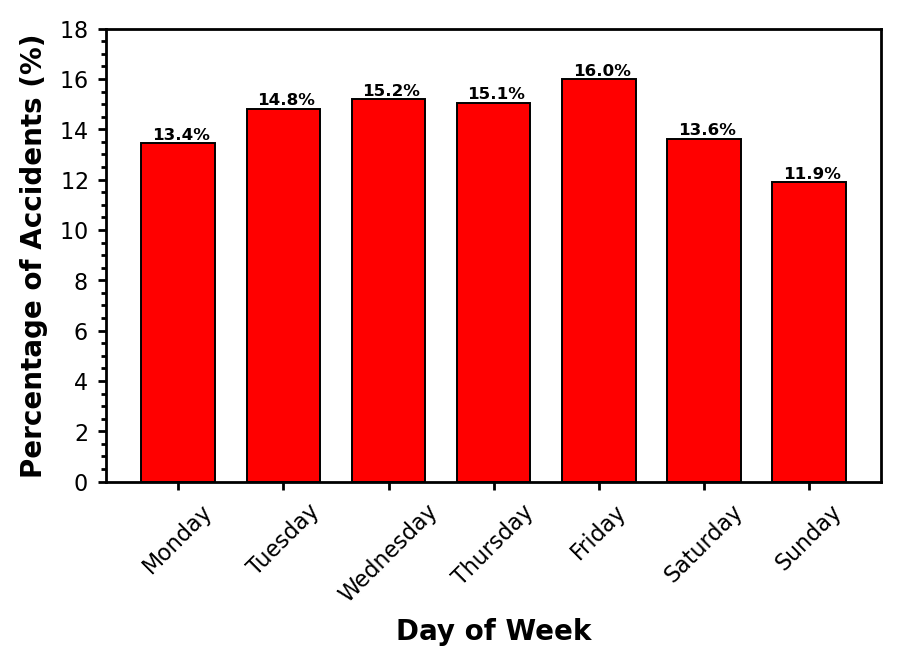

In [21]:
# bike accidents per day of the week

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped = df_bike_accidents.groupby('day_of_week').size().reset_index(name='count')
grouped['percentage'] = grouped['count'] / grouped['count'].sum()*100
grouped = grouped.set_index('day_of_week').reindex(day_order).reset_index()

x = np.arange(len(grouped))
width = 0.7

fig, ax = simple_plot_init(['Day of Week', 'Percentage of Accidents (%)'], font_size=10, figsize=[5, 3], dpi=200)

bars = ax.bar(x, grouped['percentage'], width, color='red', edgecolor='black', linewidth=0.7)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%', (bar.get_x() + bar.get_width() / 2, height),
                xytext=(1, 1.5), textcoords="offset points", ha='center', fontsize=6, fontweight='bold')

ax.set_xticks(x)
ax.set_xticklabels(grouped['day_of_week'], rotation=45)
plt.tick_params(axis='x', which='minor', length=0)
ax.set_ylim(0, 18)

plt.show()

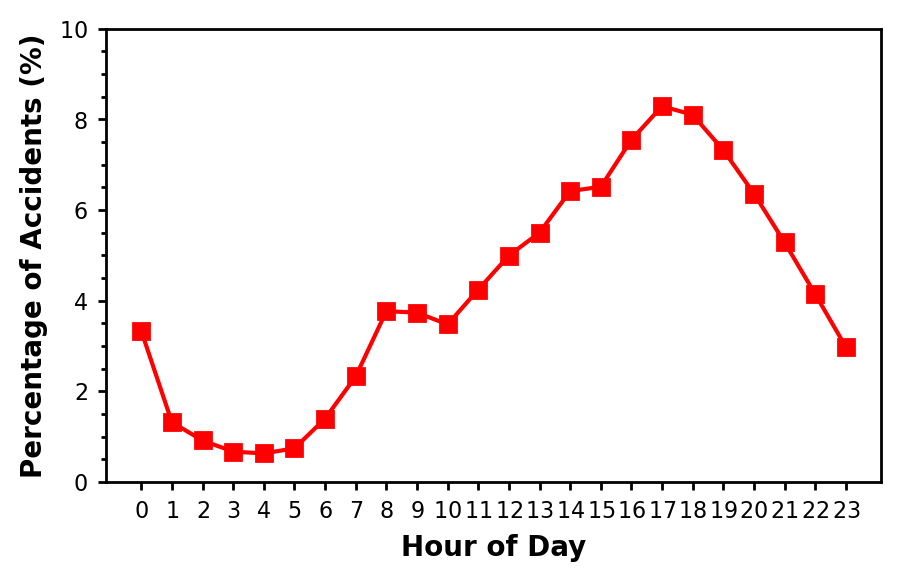

In [22]:
# bike accidents per hour

hour_grouped = df_bike_accidents.groupby('hour').size().reset_index(name='count')
hour_grouped['percentage'] = hour_grouped['count'] / hour_grouped['count'].sum() * 100

fig, ax = simple_plot_init(['Hour of Day', 'Percentage of Accidents (%)'], font_size=10, figsize=[5, 3], dpi=200)

ax.plot(hour_grouped['hour'], hour_grouped['percentage'], color='red', marker = 's')

ax.set_xticks(np.arange(0, 24, 1))
plt.tick_params(axis='x', which='minor', length=0)
ax.set_ylim(0, 10)

plt.show()

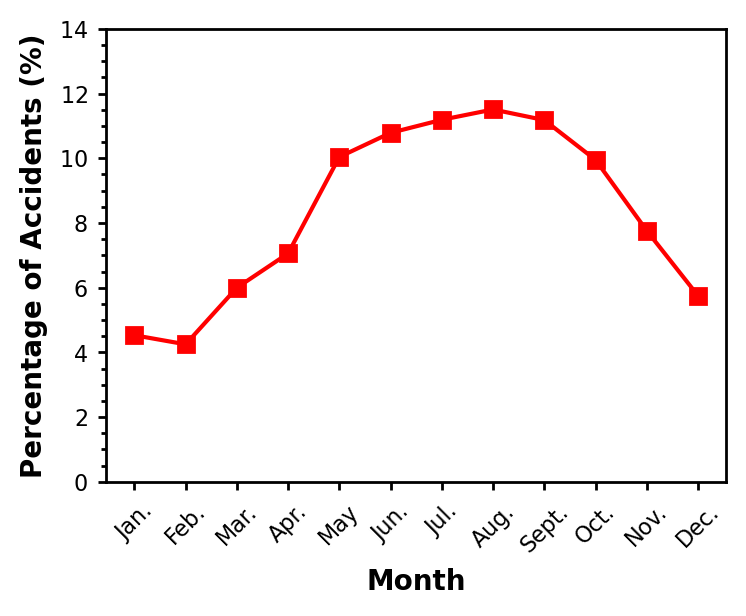

In [23]:
# bike accidents per month

month_grouped = df_bike_accidents.groupby('month').size().reset_index(name='count')
month_grouped['percentage'] = month_grouped['count'] / month_grouped['count'].sum() * 100

month_labels = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.', 
                'Sept.', 'Oct.', 'Nov.', 'Dec.']

fig, ax = simple_plot_init(['Month', 'Percentage of Accidents (%)'], font_size=10, figsize=[4, 3], dpi=200)

ax.plot(month_grouped['month'], month_grouped['percentage'], color='red', marker = 's')

ax.set_xticks(np.arange(1, 13))
ax.set_xticklabels(month_labels, rotation=45)
plt.tick_params(axis='x', which='minor', length=0)
ax.set_ylim(0, 14)

plt.show()

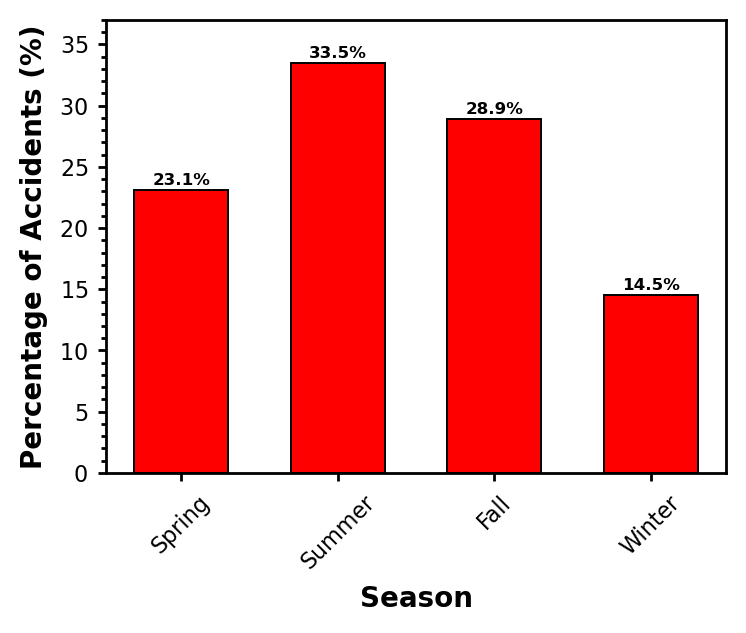

In [24]:
# bike accidents per season

season_order = ['Spring', 'Summer', 'Fall', 'Winter']
season_grouped = df_bike_accidents.groupby('season').size().reset_index(name='count')
season_grouped['percentage'] = season_grouped['count'] / season_grouped['count'].sum() * 100
season_grouped = season_grouped.set_index('season').reindex(season_order).reset_index()

x = np.arange(len(season_grouped))
width = 0.6

fig, ax = simple_plot_init(['Season', 'Percentage of Accidents (%)'], font_size=10, figsize=[4, 3], dpi=200)

bars = ax.bar(x, season_grouped['percentage'], width, color='red', edgecolor='black', linewidth=0.7)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%', (bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 2), textcoords="offset points", ha='center', fontsize=6, fontweight='bold')

ax.set_xticks(x)
ax.set_xticklabels(season_grouped['season'], rotation=45)
plt.tick_params(axis='x', which='minor', length=0)
ax.set_ylim(0, 37)

plt.show()

##### Geographical Distribution

/tmp/ipykernel_3973912/2358462884.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(accidents_borough.index, rotation=45)


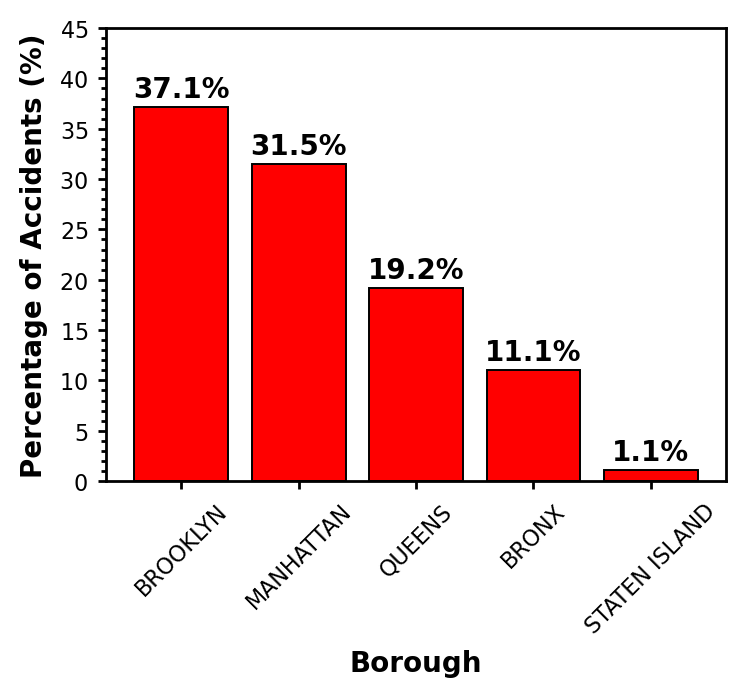

In [25]:
# distribution by borough
accidents_borough = (df_bike_accidents['BOROUGH'].value_counts(normalize=True)*100)

# plot bar plots
fig, ax = simple_plot_init([r'Borough', r'Percentage of Accidents (%)'], font_size=10, figsize = [4,3], dpi=200)

ax.bar(accidents_borough.index, accidents_borough.values, color = 'red', edgecolor='black', linewidth=0.7)

# add percentage labels on bars
for i, v in enumerate(accidents_borough.values):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tick_params(axis='x', which='minor', length=0)
ax.set_xticklabels(accidents_borough.index, rotation=45)
ax.set_ylim(0, 45)

plt.show()

##### Severity

In [21]:
# total number of injuries and fatalities
df_bike_accidents[['NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED']].sum()

NUMBER OF CYCLIST INJURED    57573
NUMBER OF CYCLIST KILLED       237
dtype: int64

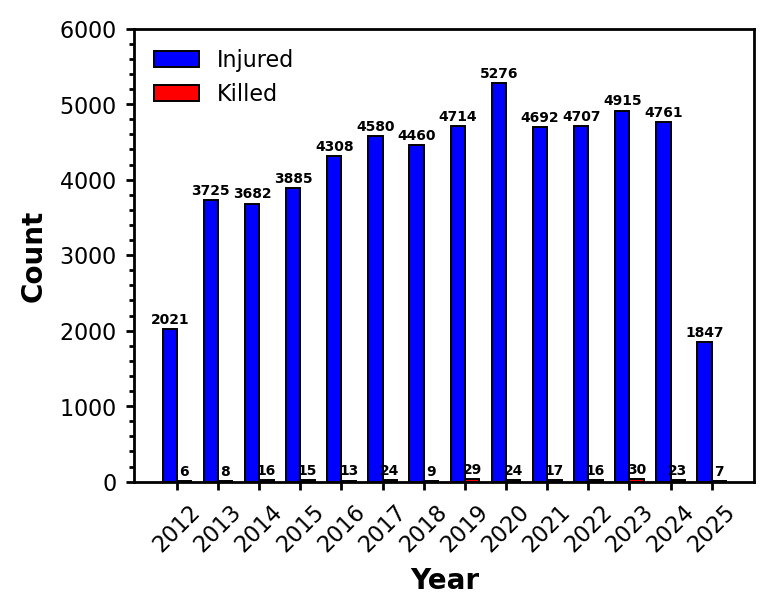

In [26]:
# severity per year

severity = df_bike_accidents.groupby('year')[['NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED']].sum()

fig, ax = simple_plot_init([r'Year', r'Count'], font_size=10, figsize = [4,3], dpi=200)

x = np.arange(len(severity.index))  # the label locations
width = 0.35

colors = ['blue', 'red']
bars1 = ax.bar(x - width/2, severity['NUMBER OF CYCLIST INJURED'], width, label='Injured', color='blue', edgecolor='black', linewidth=0.7)
bars2 = ax.bar(x + width/2, severity['NUMBER OF CYCLIST KILLED'], width, label='Killed', color='red', edgecolor='black', linewidth=0.7)

# add percentage labels on bars
for bar_group in [bars1, bars2]:
    for bar in bar_group:
        height = bar.get_height()
        ax.annotate(f'{int(height)}', (bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 2), textcoords="offset points", ha='center', fontsize=5, fontweight='bold')

ax.set_xticks(x)
ax.set_xticklabels(severity.index, rotation=45)
ax.legend(frameon=False, fontsize=8)
ax.set_ylim(0, 6000)
plt.tick_params(axis='x', which='minor', length=0)

plt.show()

##### Contributing Factor

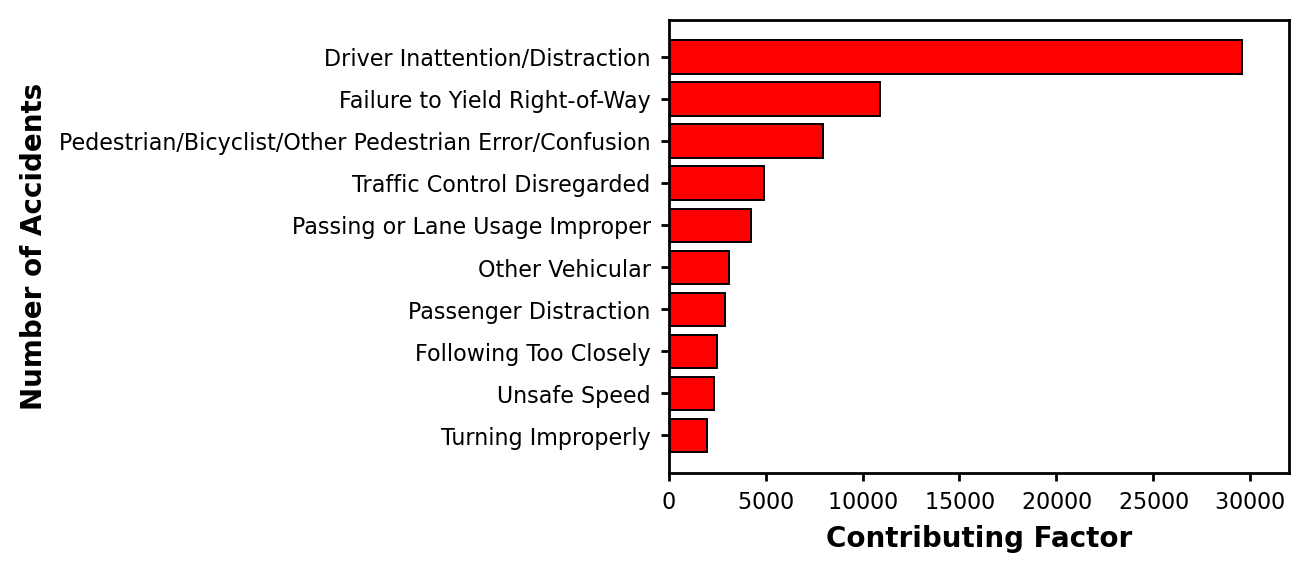

In [27]:
# combine all 'CONTRIBUTING FACTOR VEHICLE X' columns into one
factor_cols = [col for col in df_bike_accidents.columns if 'CONTRIBUTING FACTOR VEHICLE' in col]

# stack values and count
all_factors = df_bike_accidents[factor_cols].stack().reset_index(drop=True)
factor_counts = all_factors.value_counts().drop(['Unspecified', ''], errors='ignore')

# select top 10 factors
top_factors = factor_counts.head(10)

# plot
fig, ax = simple_plot_init(['Contributing Factor', 'Number of Accidents'], font_size=10, figsize=[4, 3], dpi=200)

ax.barh(top_factors.index[::-1], top_factors.values[::-1], color = 'red', edgecolor='black', linewidth=0.7)


plt.tick_params(axis='x', which='minor', length=0)
plt.tick_params(axis='y', which='minor', length=0)
ax.set_xlim(0, 32000)

plt.show()

In [96]:
# save file for further analysis

# Save NYPD bike accidents data
df_bike_accidents.to_csv('nypd_bike_accidents.csv', index=False)